In [30]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import gc
import torch
from skimage.color import lab2rgb

In [31]:
ab_path_1 = "../data/archive/ab/ab/ab1.npy"
ab_path_2 = "../data/archive/ab/ab/ab2.npy"
ab_path_3 = "../data/archive/ab/ab/ab3.npy"
l_path = "../data/archive/l/gray_scale.npy"

In [32]:
ab_data_1 = np.load(ab_path_1)
ab_data_2 = np.load(ab_path_2)
ab_data_3 = np.load(ab_path_3)
L_data = np.load(l_path)
dataset_1 = (L_data[:10000], ab_data_1)
dataset_2 = (L_data[10000:20000], ab_data_2)
dataset_3 = (L_data[20000:25000], ab_data_3)
gc.collect()

3168

In [33]:
datasets = [dataset_1, dataset_2, dataset_3]

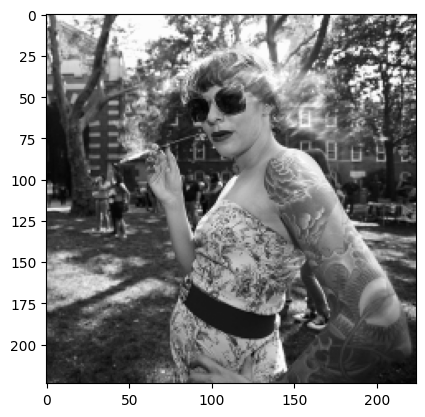

In [34]:
for i in range(len(L_data)):
    # print(ab_data[i])
    # print(L_data[i])
    L_data[i]
    plt.imshow(L_data[i], cmap='gray', vmin=0, vmax=255)
    break

In [35]:
len(L_data[1])

224

In [36]:
for idx, dataset in enumerate(datasets):
    L_data_subset, ab_data_subset = dataset

    for i in range(len(L_data_subset)):
        # Create a blank image for black and white
        img_bw = np.zeros((224, 224, 3), dtype='uint8')
        img_bw[:, :, 0] = L_data_subset[i]

        # Duplicate the channel to convert L to RGB for black and white
        img_bw[:, :, 1:] = img_bw[:, :, 0:1]

        if idx <= 1:
            os.makedirs("../data/train_black_white", exist_ok=True)
            # Save the black and white image to a .jpg file
            cv2.imwrite(f'../data/train_black_white/bw_image_dataset_{idx}_sample_{i}.jpg', img_bw)
        else:
            os.makedirs("../data/test_black_white", exist_ok=True)
            # Save the black and white image to a .jpg file
            cv2.imwrite(f'../data/test_black_white/bw_image_dataset_{idx}_sample_{i}.jpg', img_bw)

        # Create a blank image for colored
        img_colored = np.zeros((224, 224, 3), dtype='uint8')
        img_colored[:, :, 0] = L_data_subset[i]
        img_colored[:, :, 1:] = ab_data_subset[i]
        
        # Convert LAB to RGB for colored
        img_colored_rgb = cv2.cvtColor(img_colored, cv2.COLOR_LAB2RGB)

        if idx <= 1:
            os.makedirs("../data/train_colored_normal", exist_ok=True)
            # Save the colored image to a .jpg file
            cv2.imwrite(f'../data/train_colored_normal/colored_image_dataset_{idx}_sample_{i}.jpg', cv2.cvtColor(img_colored_rgb, cv2.COLOR_RGB2BGR))
        else:
            os.makedirs("../data/test_colored_normal", exist_ok=True)
            # Save the colored image to a .jpg file
            cv2.imwrite(f'../data/test_colored_normal/colored_image_dataset_{idx}_sample_{i}.jpg', cv2.cvtColor(img_colored_rgb, cv2.COLOR_RGB2BGR))